In [78]:

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [79]:
## Initialising the CNN
classifier = Sequential()

In [80]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [81]:
## Flattening
classifier.add(Flatten())

In [82]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [83]:
#output layer
classifier.add(Dense(units = 18, activation = 'softmax'))

In [84]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [85]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
__________

In [86]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [87]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [88]:
## Importing training data
train_set = train_datagen.flow_from_directory(r'D:\Term 3\Artificial Intelligence\datas\Fruit\Training',
                                               target_size=(64, 64),
                                               batch_size=6,
                                               class_mode='binary')

Found 9310 images belonging to 18 classes.


In [89]:
train_set.class_indices

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow': 9,
 'Banana': 10,
 'Banana Red': 11,
 'Tomato 1': 12,
 'Tomato 2': 13,
 'Tomato 3': 14,
 'Tomato 4': 15,
 'Tomato Cherry Red': 16,
 'Tomato Maroon': 17}

In [90]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Banana': 10, 'Banana Red': 11, 'Tomato 1': 12, 'Tomato 2': 13, 'Tomato 3': 14, 'Tomato 4': 15, 'Tomato Cherry Red': 16, 'Tomato Maroon': 17}


In [91]:
## Importng test data
test_set = test_datagen.flow_from_directory(r'D:\Term 3\Artificial Intelligence\datas\Fruit\Test',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 3119 images belonging to 18 classes.


In [92]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

Epoch 1/5
50/50 [==============================] - 4s 85ms/step - loss: 2.6238 - acc: 0.1300 - val_loss: 2.2623 - val_acc: 0.2325
Epoch 2/5
50/50 [==============================] - 3s 54ms/step - loss: 1.9845 - acc: 0.3000 - val_loss: 1.6877 - val_acc: 0.4254
Epoch 3/5
50/50 [==============================] - 3s 54ms/step - loss: 1.5726 - acc: 0.4033 - val_loss: 1.1488 - val_acc: 0.5877
Epoch 4/5
50/50 [==============================] - 3s 54ms/step - loss: 1.2750 - acc: 0.5600 - val_loss: 1.0359 - val_acc: 0.5132
Epoch 5/5
50/50 [==============================] - 3s 55ms/step - loss: 1.0249 - acc: 0.6333 - val_loss: 1.0317 - val_acc: 0.6009


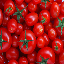

In [103]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(r'D:\Term 3\Artificial Intelligence\datas\Fruit\inference\tomato.jpg'
                           ,target_size =(64,64))
test_image

In [104]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [107]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=test_image.reshape(1,64,64,3)
result = classifier.predict(test_image)

In [110]:
result = result.argmax()
result

16

In [111]:
## Class label of dog and cat

if result == 0:
    prediction = 'Apple Braeburn'
elif result ==1:
    prediction = 'Apple Golden 1'
elif result ==2:
    prediction = 'Apple Golden 2'
elif result ==3:
    prediction = 'Apple Golden 3'
elif result ==4:
    prediction = 'Apple Granny Smith'
elif result ==5:
    prediction = 'Apple Red 1'  
elif result ==6:
    prediction = 'Apple Red 2'   
elif result ==7:
    prediction = 'Apple Red 3'
elif result ==8:
    prediction = 'Apple Red Delicious'
elif result ==9:
    prediction = 'Apple Red Yellow'
elif result ==10:
    prediction =  'Banana'
elif result ==11:
    prediction = 'Banana Red'    
elif result ==12:
    prediction = 'Tomato 1'
elif result ==13:
    prediction = 'Tomato 2'
elif result ==14:
    prediction = 'Tomato 3'    
elif result ==15:
    prediction = 'Tomato 4'
elif result ==16:
    prediction ='Tomato Cherry Red'
else:
    prediction = 'Tomato Maroon'    

In [112]:
prediction

'Tomato Cherry Red'